# Loading Images

Images are stored as `numpy` multidimensional arrays.  This will definitely come in
handy and avoid the need to mess about directly with the images.

In [3]:
import imageio.v3 as iio
eight = iio.imread(uri='../data/raw/training/eight.tif')
print(type(eight))

<class 'numpy.ndarray'>


Load some more libraries.

In [4]:

from matplotlib import pyplot
import numpy as np
import skimage as ski

Renaming the imports seems to be a thing.  At least for `numpy` being renamed to `np`.

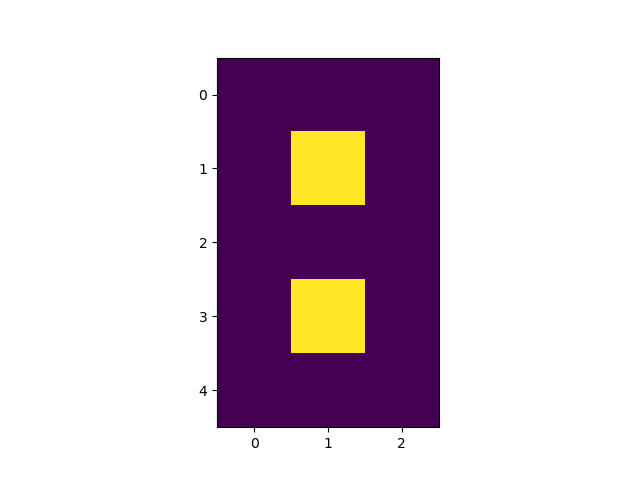

In [5]:
%matplotlib widget
fig, ax = pyplot.subplots()
ax.imshow(eight)

Let's look at the pixels in the image.

In [7]:
print(eight.shape)
print(eight)

(5, 3)
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
